In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [3]:
# Create an empty graph object with no nodes and edges.
G = nx.Graph() # DiGraph, MultiGraph, MultiDiGraph

In [4]:
## Add nodes to our graph object
# In NetworkX, nodes can be any hashable object e.g. a text string, an image,
# an XML object, another Graph, a customized node object, etc.

G.add_node('1')
G.add_node(1)
G.add_node('second')

In [5]:
# G.add_node({'dictionary': 'will throw error'})
# G.add_node([1, 2])

In [6]:
list_of_nodes = [1, 2, 3, 'node4']
G.add_nodes_from(list_of_nodes)

In [7]:
# Access nodes in a Graph object
G.nodes()

NodeView(('1', 1, 'second', 2, 3, 'node4'))

[0, 1, 2, 3, 4, 5, 6]


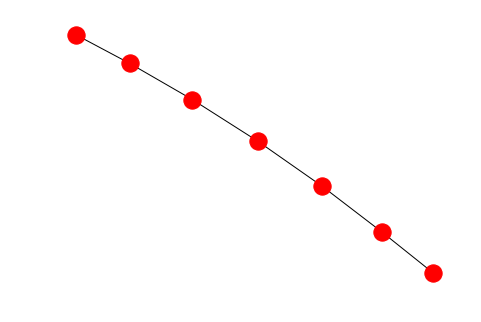

In [8]:
# NetworkX has a lot of graph generators path_graph is one of them.
H = nx.path_graph(7)
print(H.nodes())
nx.draw(H)

In [9]:
G.add_nodes_from(H)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6]


In [10]:
G.add_node(H)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6, <networkx.classes.graph.Graph object at 0x11158aba8>]


In [11]:
# Now let's talk about edges.
# Edge between two nodes means that they share some property/relationship
# G.add_node(H)
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')

In [12]:
G.edges()

EdgeView([('second', 0), ('second', 'node4'), (2, 3)])

In [13]:
list_of_edges = [(2, 3), (4, 5), ('node4', 0)]
G.add_edges_from(list_of_edges)
# Check out edges
G.edges()

EdgeView([('second', 0), ('second', 'node4'), (2, 3), ('node4', 0), (4, 5)])

In [14]:
# Number of nodes and edges.
print(G.number_of_nodes(), len(G), len(G.nodes()))
print(G.number_of_edges(), len(G.edges()))

11 11 11
5 5


In [15]:
print(G.nodes())
G.remove_node(0)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6, <networkx.classes.graph.Graph object at 0x11158aba8>]
['1', 1, 'second', 2, 3, 'node4', 4, 5, 6, <networkx.classes.graph.Graph object at 0x11158aba8>]


In [16]:
print(G.edges())
G.remove_edge(4, 5)
print(G.edges())

[('second', 'node4'), (2, 3), (4, 5)]
[('second', 'node4'), (2, 3)]


In [17]:
G.clear()
print(G.nodes(), G.edges())

[] []


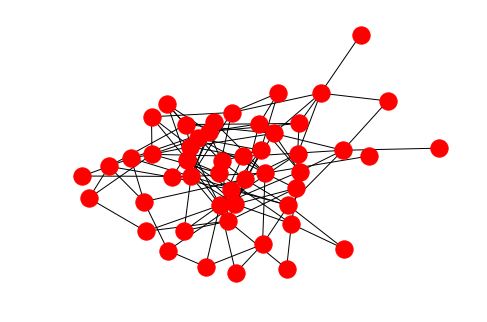

In [33]:
# One more graph generator
G = nx.erdos_renyi_graph(50, 0.1, seed=1)
# Let's checkout nodes and edges
# print(G.nodes())
# print(G.edges())

nx.draw(G)

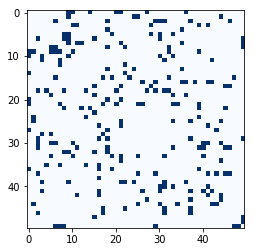

In [34]:
matrix = nx.to_numpy_matrix(G)

# print matrix

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.show()


In [37]:
G.clear()
G.add_edge(1, 2, weight=4.7)

G.add_edges_from([(3, 4), (4, 5)], color='red')

G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

G[1][2]['weight'] = 4.7

G.add_node(1, time='13:00')
print(G.nodes())
print(G.nodes(data=True))

# Accessing the graph dictionary
print('nodes: ', G.nodes())
print('edges: ', G.edges())

print(G[1])
print(G[1][2])
print(G[1][2]['color'])

[1, 2, 3, 4, 5]
[(1, {'time': '13:00'}), (2, {}), (3, {}), (4, {}), (5, {})]
nodes:  [1, 2, 3, 4, 5]
edges:  [(1, 2), (2, 3), (3, 4), (4, 5)]
{2: {'weight': 4.7, 'color': 'blue'}}
{'weight': 4.7, 'color': 'blue'}
blue


### Exercise - 1

In [38]:
G = nx.Graph()
list_of_cities = [('Paris', 'Munich', 841), ('Munich', 'Berlin', 584), ('Berlin', 'London', 1101), ('Paris', 'Barcelona', 1038)]
G.add_weighted_edges_from(list_of_cities)

# Iterate through the edges and find the highest weight.



In [39]:
# Create a random erdos reyni graph
G = nx.erdos_renyi_graph(20, 0.2, seed=1)

In [40]:
# draw the graph using nx.draw and with labels


In [41]:
# find the number of neighbors of a node


In [42]:
# find the degree centrality of first 5 nodes in the network


In [43]:
# Import and create a networkx graph from Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network.

import csv
authors_graph = nx.Graph()
with open('CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

In [44]:
# print the number of nodes and edges of this network


In [45]:
# Print the neighbors of a node and print the degree of the node using len() and nx.degree()


### Exercise - 2

Create a list of (node, degree of node) tuples and find the node with maximum degree.

In [46]:
# nx.degree_centrality(authors_graph)
# authors_graph.degree()


### Exercise - 3

Plot degree centrality of authors_graph.

(count vs degree centrality)

In [47]:
# Plot degree centrality of various graph generators

G = nx.erdos_renyi_graph(1000, 0.9, seed=1)
H = nx.barabasi_albert_graph(1000, 30, 0.3)
K = nx.powerlaw_cluster_graph(1000, 30, 0.3)

In [48]:
# plt.hist(list(nx.degree_centrality(G).values()))
# plt.show()

In [49]:
# Connected components of a graph.
print([len(c) for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)])

[4158, 14, 12, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [50]:
# Connected component subgraphs of a graph. Returns a generator of subgraphs.
graphs = [c for c in sorted(nx.connected_component_subgraphs(authors_graph), key=len, reverse=True)]

### Excersise - 4
##### Six degrees of separation, Erdos Number, Bacon Number!!

Find the '22504' number of the graph G, if there is no connection between nodes then give it the number `-1`.
Also plot a histogram of the '22504' number.

Find the average shortest path length in the first component i.e. graphs[0]


HINT: `nx.shortest_path_length`

### Directed Graphs

In [51]:
# Create a DiGraph object and add edges to it to make a star graph.

list_of_edges = [(1, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)]
